In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\sales_data_Cleaned.csv")

In [48]:
df['Location'].value_counts()

Location
L04    135272
L07     87870
L03     80750
L01     65031
L10     31554
L05     27733
L06     25590
L08     19555
L02     12930
L09      8535
Name: count, dtype: int64

In [49]:
df.sample(10)

,ProductID,Location,Date,UnitsSold,PromoCodeUsed
117639,P0328,L01,2024-02-19,6,No
202082,P0425,L04,2024-04-28,2,Yes
363930,P0224,L02,2024-01-11,0,Yes
180826,P0379,L06,2024-03-26,10,Yes
227620,P0262,L03,2024-02-20,5,No
242412,P0173,L07,2024-09-30,8,No
196933,P0134,L05,2024-03-01,6,Yes
270219,P0088,L04,2024-12-16,2,No
66592,P0443,L03,2024-06-25,7,Yes
396402,P0067,L02,2024-05-02,8,No


# Univariate Analysis

# PromoCode Used – Countplot

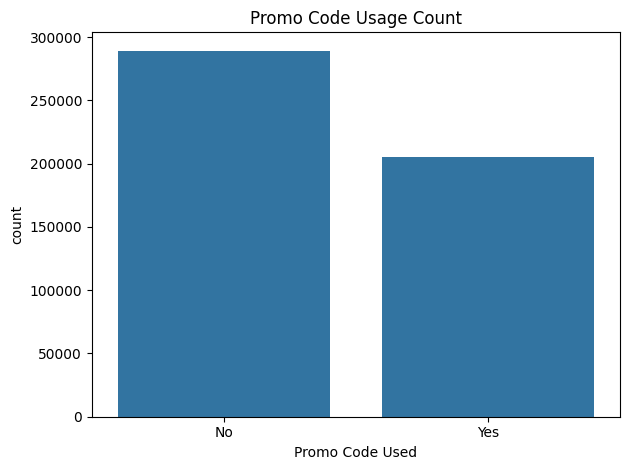

In [50]:
sns.countplot(data=df, x='PromoCodeUsed')
plt.title("Promo Code Usage Count")
plt.xlabel("Promo Code Used")
plt.tight_layout()
plt.show()


#  Location-wise Order Count

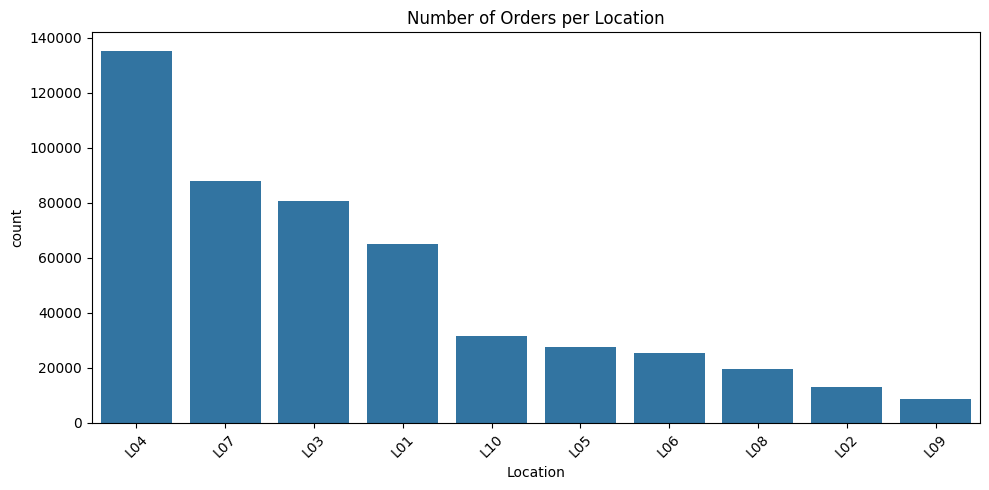

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title("Number of Orders per Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# UnitSold

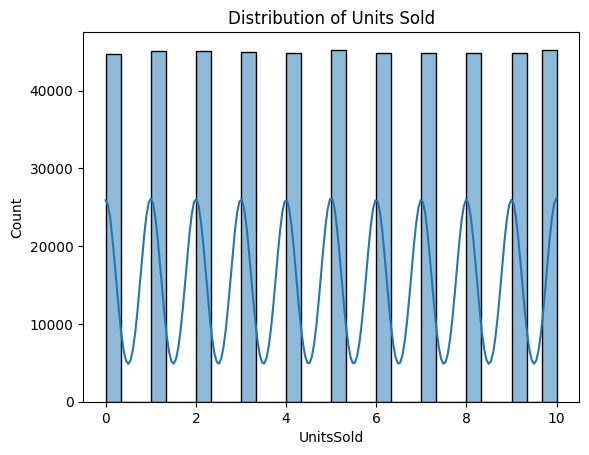

In [52]:
import seaborn as sns
sns.histplot(df['UnitsSold'], bins=30, kde=True)
plt.title("Distribution of Units Sold")
plt.show()

# Top Selling Products

In [53]:
df['ProductID'].value_counts()

ProductID
P0271    1069
P0344    1068
P0045    1066
P0487    1066
P0048    1065
         ... 
P0381     911
P0061     911
P0317     910
P0227     910
P0060     901
Name: count, Length: 500, dtype: int64

Unique Products: 500
ProductID
P0045    5485
P0487    5483
P0468    5448
P0278    5405
P0063    5384
P0165    5381
P0435    5375
P0221    5348
P0265    5346
P0377    5340
Name: UnitsSold, dtype: int64


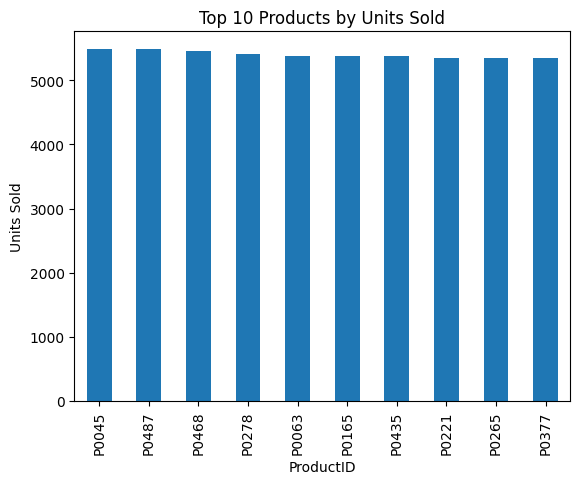

In [54]:
print("Unique Products:", df['ProductID'].nunique())
top_products = df.groupby('ProductID')['UnitsSold'].sum().sort_values(ascending=False).head(10)
print(top_products)

top_products.plot(kind='bar', title='Top 10 Products by Units Sold')
plt.ylabel('Units Sold')
plt.show()

# Date (Time-based Feature)

Date Range: 2024-01-01 00:00:00 to 2024-12-30 00:00:00
Missing Dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


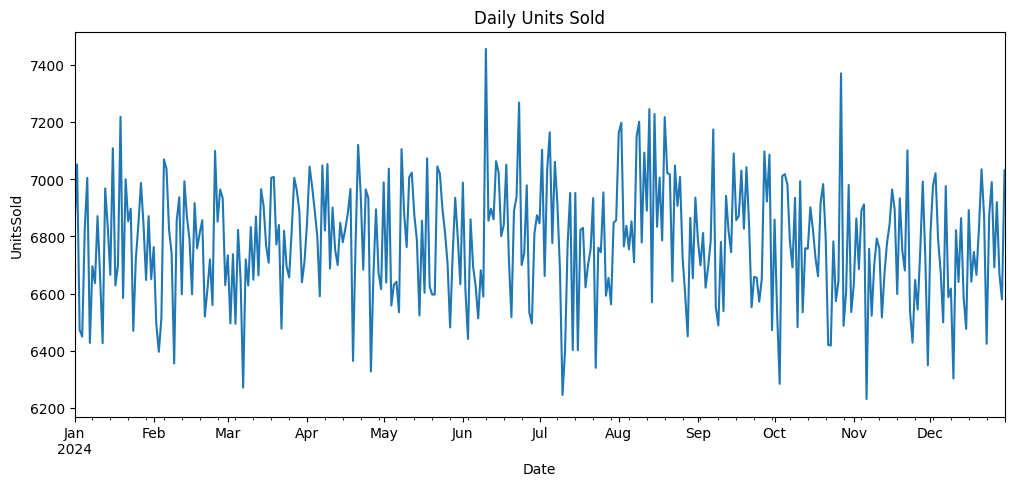

In [55]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check range and missing dates
print("Date Range:", df['Date'].min(), "to", df['Date'].max())
print("Missing Dates:", pd.date_range(df['Date'].min(), df['Date'].max()).difference(df['Date'].unique()))

# Plot daily sales
daily_sales = df.groupby('Date')['UnitsSold'].sum()
daily_sales.plot(figsize=(12,5), title='Daily Units Sold', ylabel='UnitsSold')
plt.show()


Location
L04    676402
L07    437941
L03    404475
L01    325097
L10    158621
L05    138264
L06    127601
L08     98112
L02     65113
L09     43032
Name: UnitsSold, dtype: int64


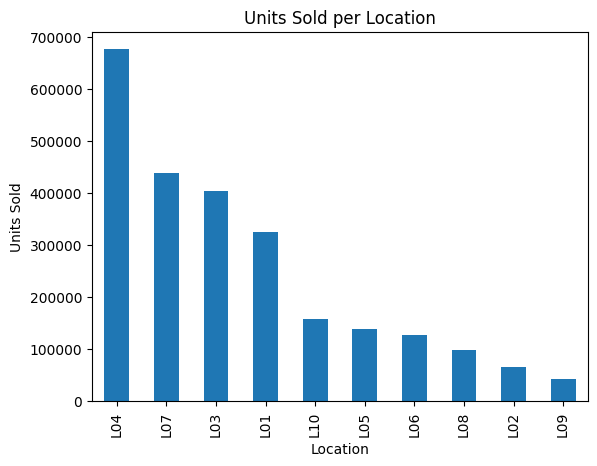

In [56]:
location_sales = df.groupby('Location')['UnitsSold'].sum().sort_values(ascending=False)
print(location_sales)

location_sales.plot(kind='bar', title='Units Sold per Location')
plt.ylabel('Units Sold')
plt.show()


# Bivariate Analysis

# UnitSolds vs Location

<Axes: xlabel='Location', ylabel='UnitsSold'>

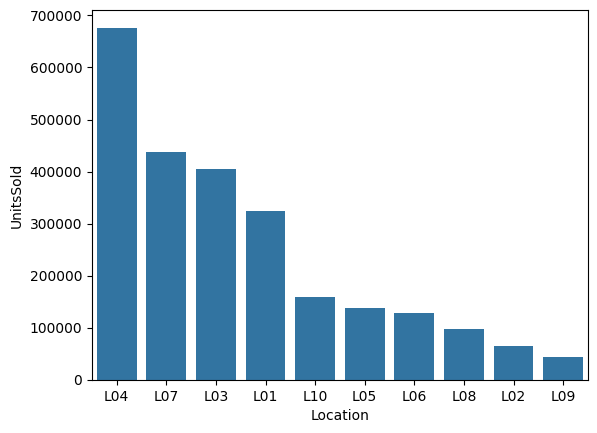

In [57]:
# Sum UnitsSold per Location
units_sum = df.groupby('Location')['UnitsSold'].sum().reset_index()
units_sum = units_sum.sort_values(by='UnitsSold', ascending=False)

# Plot barplot of total UnitsSold
sns.barplot(data=units_sum, x='Location', y='UnitsSold')


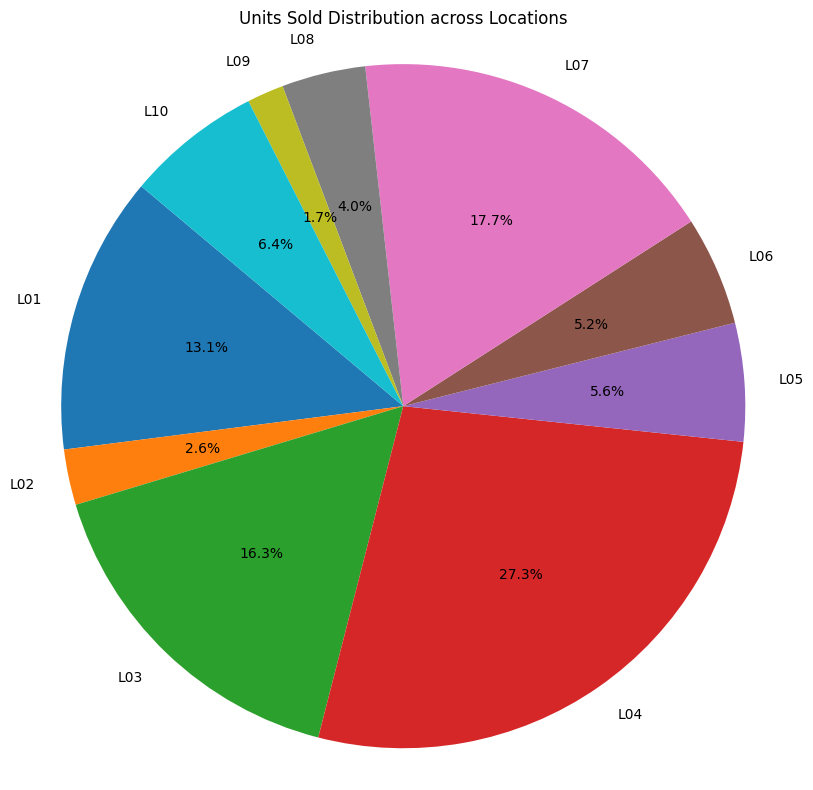

In [58]:
location_sales = df.groupby('Location')['UnitsSold'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_sales['UnitsSold'], labels=location_sales['Location'], autopct='%1.1f%%', startangle=140)
plt.title('Units Sold Distribution across Locations')
plt.axis('equal')
plt.tight_layout()
plt.show()

# UnitSold vs PromoCode

C:\Users\sachi\AppData\Local\Temp\ipykernel_4268\3062756305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_group, x='PromoCodeUsed', y='UnitsSold', palette='pastel')


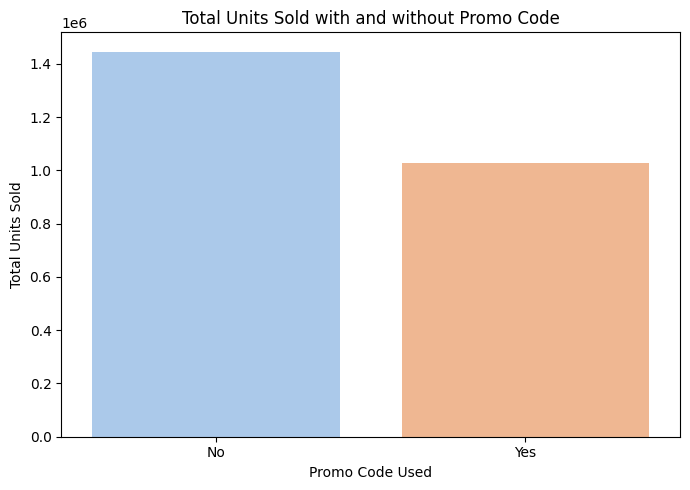

In [59]:
promo_group = df.groupby('PromoCodeUsed')['UnitsSold'].sum().reset_index()
promo_group = promo_group.sort_values(by='UnitsSold', ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(data=promo_group, x='PromoCodeUsed', y='UnitsSold', palette='pastel')
plt.title('Total Units Sold with and without Promo Code')
plt.ylabel('Total Units Sold')
plt.xlabel('Promo Code Used')
plt.tight_layout()
plt.show()


# UnitSold vs Date

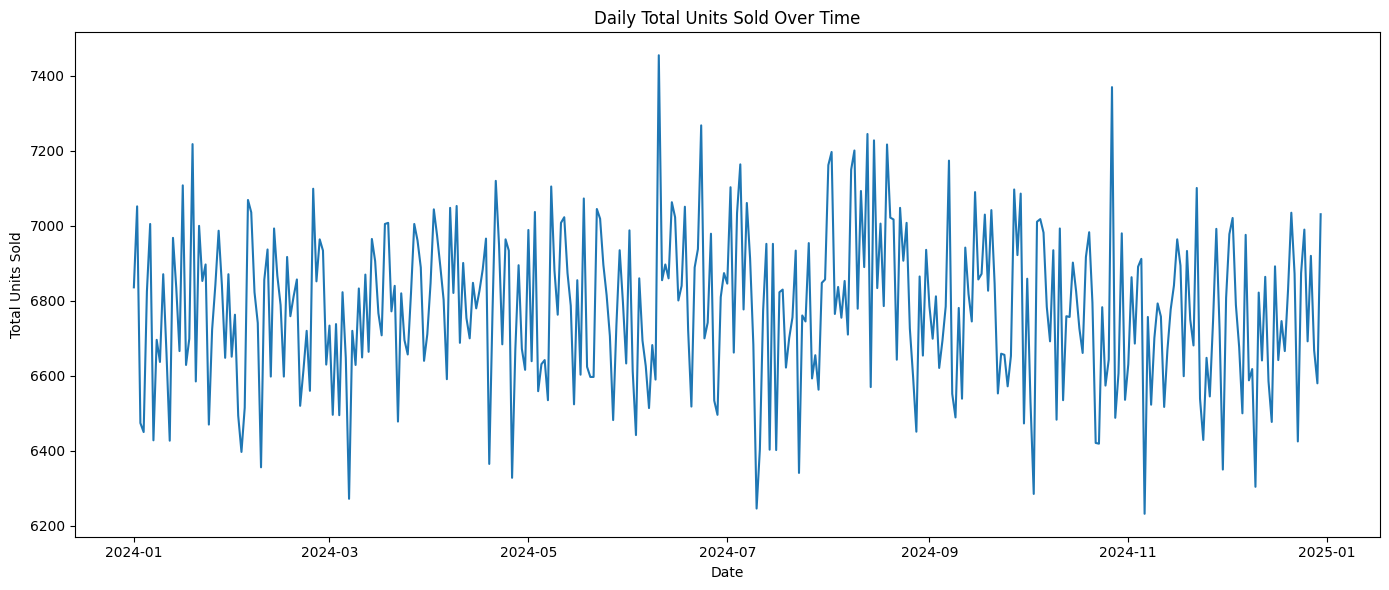

In [60]:
sales_data=df

sales_data['Date'] = pd.to_datetime(sales_data['Date'])
daily_sales = sales_data.groupby('Date')['UnitsSold'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Date', y='UnitsSold')
plt.title('Daily Total Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.tight_layout()
plt.show()


C:\Users\sachi\AppData\Local\Temp\ipykernel_4268\1283925504.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='ProductID', y='UnitsSold', palette='viridis')


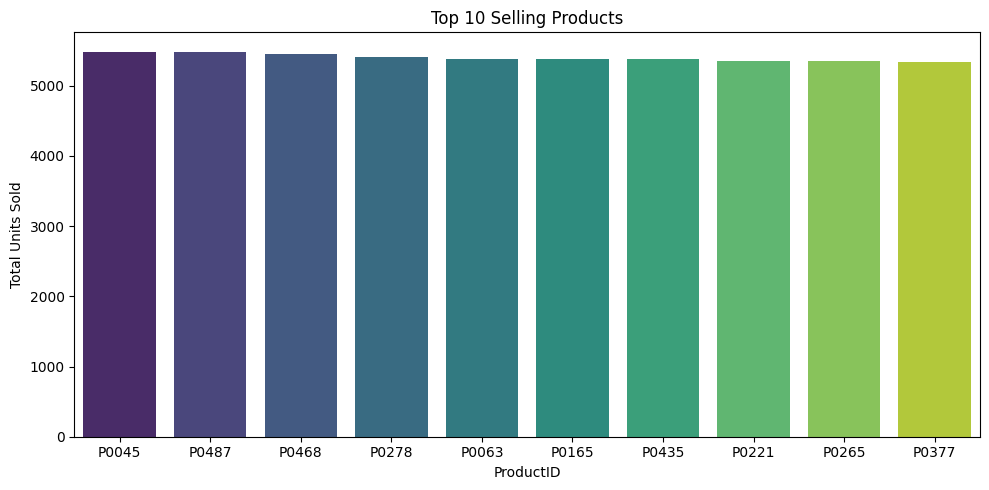

In [61]:
top_products = (
    sales_data.groupby('ProductID')['UnitsSold']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x='ProductID', y='UnitsSold', palette='viridis')
plt.title('Top 10 Selling Products')
plt.ylabel('Total Units Sold')
plt.xlabel('ProductID')
plt.tight_layout()
plt.show()


# product sold by location

In [62]:
product_sales = sales_data.groupby(['Location', 'ProductID'])['UnitsSold'].sum().reset_index()


In [63]:
top_products = product_sales.sort_values('UnitsSold', ascending=False).groupby('Location').first().reset_index()


In [64]:
print(top_products)


  Location ProductID  UnitsSold
0      L01     P0404        842
1      L02     P0118        267
2      L03     P0435        996
3      L04     P0050       1666
4      L05     P0457        414
5      L06     P0442        380
6      L07     P0179       1138
7      L08     P0102        317
8      L09     P0346        167
9      L10     P0468        479


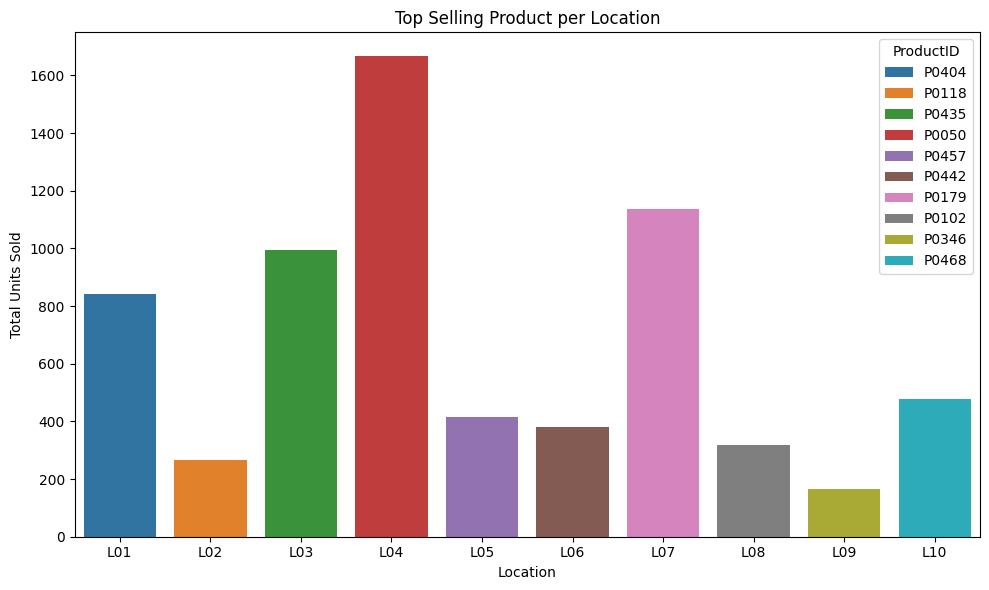

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Location', y='UnitsSold', hue='ProductID', dodge=False, palette='tab10')
plt.title('Top Selling Product per Location')
plt.xlabel('Location')
plt.ylabel('Total Units Sold')
plt.tight_layout()
plt.show()

# Find the product on which promo is used mostly

In [66]:
promo_used = sales_data[sales_data['PromoCodeUsed'] == 'Yes']


In [67]:
promo_by_product = promo_used.groupby('ProductID').size().reset_index(name='PromoUsedCount')


In [68]:
top_promo_products = promo_by_product.sort_values('PromoUsedCount', ascending=False)
print(top_promo_products.head(10))  # Top 10 products


    ProductID  PromoUsedCount
343     P0344             558
263     P0264             542
347     P0348             541
485     P0486             532
235     P0236             529
210     P0211             529
14      P0015             528
175     P0176             527
1       P0002             526
433     P0434             526


C:\Users\sachi\AppData\Local\Temp\ipykernel_4268\1778127560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_promo_products.head(10), x='ProductID', y='PromoUsedCount', palette='viridis')


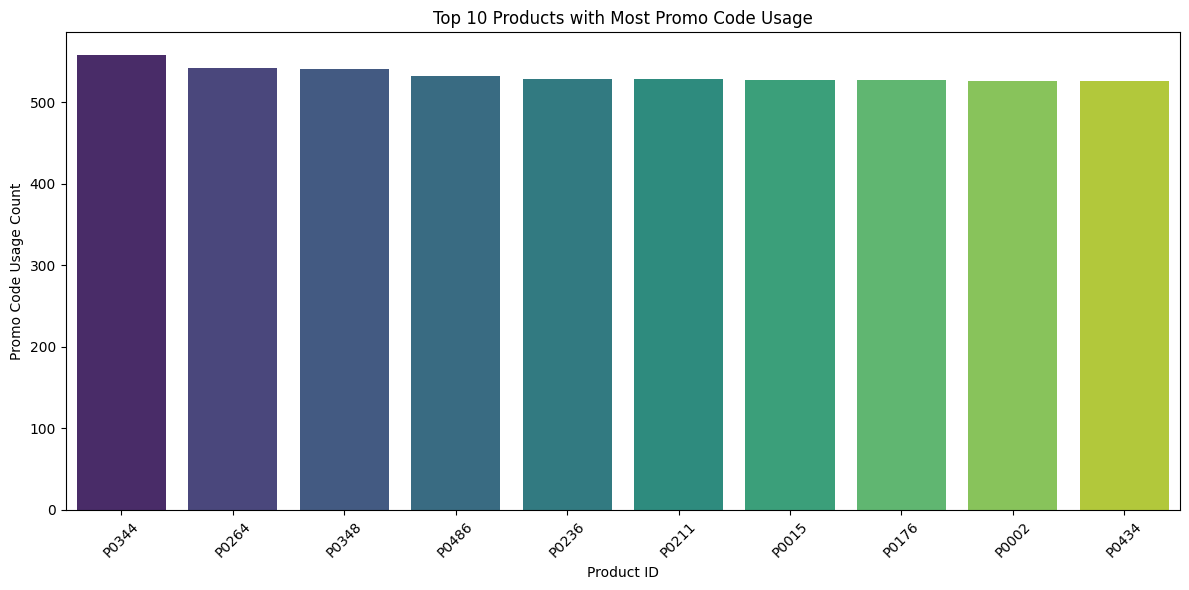

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_promo_products.head(10), x='ProductID', y='PromoUsedCount', palette='viridis')
plt.title('Top 10 Products with Most Promo Code Usage')
plt.xlabel('Product ID')
plt.ylabel('Promo Code Usage Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
# Step 1: Get all unique products
all_products = sales_data['ProductID'].unique()

# Step 2: Get products where promo code was used
promo_used_products = sales_data[sales_data['PromoCodeUsed'] == 'Yes']['ProductID'].unique()

# Step 3: Set difference → Products with 0 promo code usage
no_promo_products = set(all_products) - set(promo_used_products)

# Step 4: Convert to list or DataFrame
no_promo_products = list(no_promo_products)
print("Number of products with no promo code usage:", len(no_promo_products))
print(no_promo_products[:10])  # Show first 10


Number of products with no promo code usage: 0
[]


In [71]:
# Step 1: Count promo usage per product
promo_used = sales_data[sales_data['PromoCodeUsed'] == 'Yes']
promo_counts = promo_used.groupby('ProductID').size().reset_index(name='PromoUsedCount')

# Step 2: Filter products with promo used less than a threshold
low_promo_products = promo_counts[promo_counts['PromoUsedCount'] < 5]  # You can change threshold

print("Products with promo used less than 5 times:")
print(low_promo_products)


Products with promo used less than 5 times:
Empty DataFrame
Columns: [ProductID, PromoUsedCount]
Index: []


In [72]:
# Get all products as DataFrame
all_products_df = pd.DataFrame({'ProductID': all_products})

# Left join to include 0 values
promo_counts_full = all_products_df.merge(promo_counts, on='ProductID', how='left').fillna(0)

# Convert PromoUsedCount to integer
promo_counts_full['PromoUsedCount'] = promo_counts_full['PromoUsedCount'].astype(int)

# Filter those with 0
zero_promo_products = promo_counts_full[promo_counts_full['PromoUsedCount'] == 0]

print("Products with 0 promo code usage:")
print(zero_promo_products.head(10))


Products with 0 promo code usage:
Empty DataFrame
Columns: [ProductID, PromoUsedCount]
Index: []


C:\Users\sachi\AppData\Local\Temp\ipykernel_4268\2886224365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_promo_products, x='ProductID', y='PromoUsedCount', palette='magma')


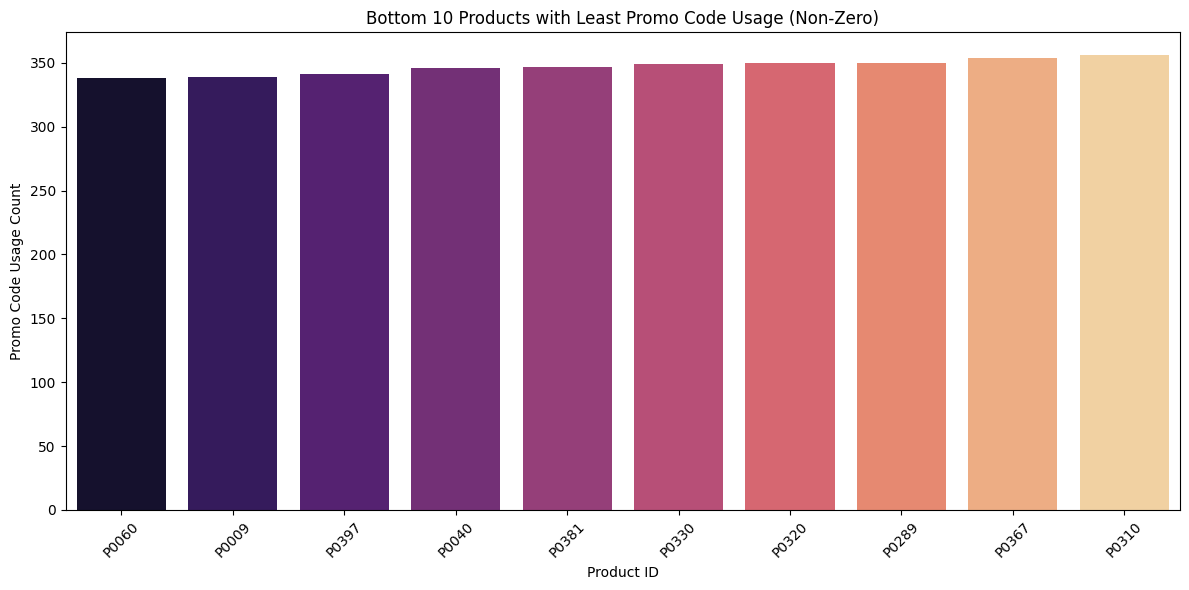

In [73]:
bottom_promo_products = promo_counts.sort_values(by='PromoUsedCount', ascending=True).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_promo_products, x='ProductID', y='PromoUsedCount', palette='magma')
plt.title('Bottom 10 Products with Least Promo Code Usage (Non-Zero)')
plt.xlabel('Product ID')
plt.ylabel('Promo Code Usage Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Location with more revenue

In [74]:
df.dtypes

ProductID                object
Location                 object
Date             datetime64[ns]
UnitsSold                 int64
PromoCodeUsed            object
dtype: object

In [98]:
pricing_data =pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\pricing_data_Cleaned.csv.csv",parse_dates=['date'])

In [99]:
pricing_data.dtypes

productid                   object
location                    object
date                datetime64[ns]
price                      float64
discount_percent             int64
competitorprice            float64
adcampaign                  object
finalprice                 float64
dtype: object

In [100]:
sales_data.columns = sales_data.columns.str.lower()
pricing_data.columns = pricing_data.columns.str.lower()

C:\Users\sachi\AppData\Local\Temp\ipykernel_4268\2848224421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_revenue, x='location', y='Revenue', palette='coolwarm')


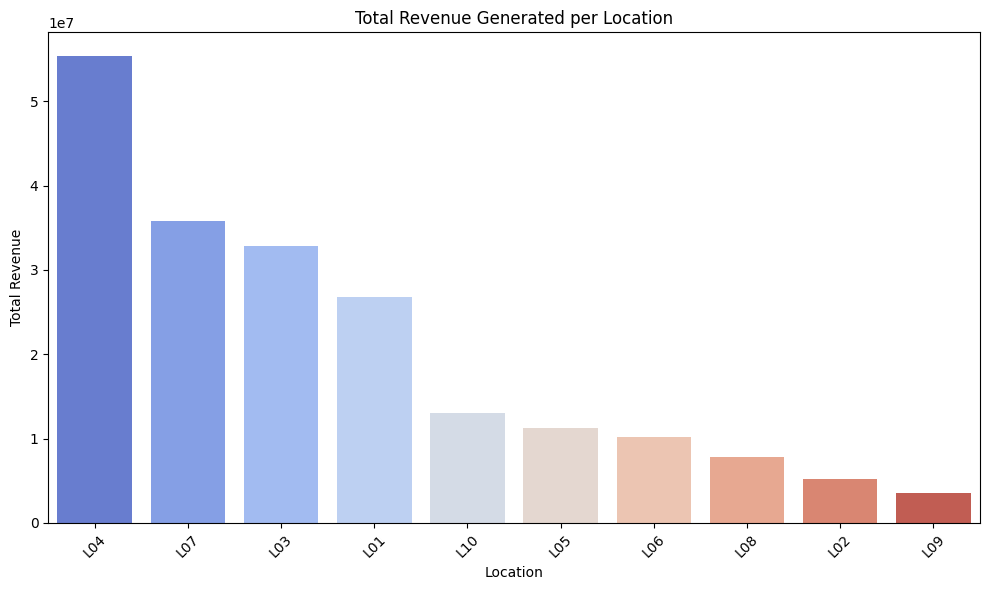

In [101]:
# Step 1: Merge sales and pricing data
merged_df = pd.merge(sales_data, pricing_data, on=['productid', 'location', 'date'], how='inner')

# Step 2: Calculate revenue
merged_df['Revenue'] = merged_df['unitssold'] * merged_df['price']

# Step 3: Aggregate revenue by location
location_revenue = merged_df.groupby('location')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=location_revenue, x='location', y='Revenue', palette='coolwarm')
plt.title('Total Revenue Generated per Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# selling by monthly

C:\Users\sachi\AppData\Local\Temp\ipykernel_4268\4258948918.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Month', y='unitssold', palette='viridis')


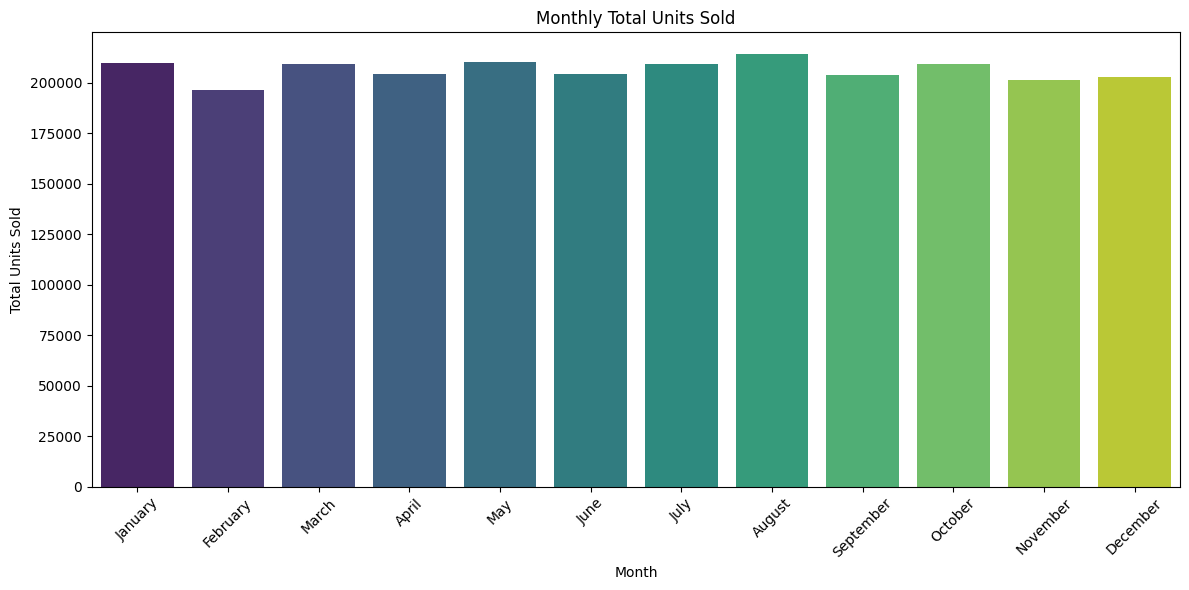

In [102]:
# Step 1: Make sure 'Date' column is datetime
sales_data['date'] = pd.to_datetime(sales_data['date'], errors='coerce')

# Step 2: Extract Month from Date
sales_data['Month'] = sales_data['date'].dt.month_name()

# Step 3: Group by Month and Sum Units Sold
monthly_sales = sales_data.groupby('Month')['unitssold'].sum().reset_index()

# Optional: Sort months in calendar order
from pandas.api.types import CategoricalDtype
month_order = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'], 
    ordered=True)
monthly_sales['Month'] = monthly_sales['Month'].astype(month_order)
monthly_sales = monthly_sales.sort_values('Month')

# Step 4: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=monthly_sales, x='Month', y='unitssold', palette='viridis')
plt.title("Monthly Total Units Sold")
plt.ylabel("Total Units Sold")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
top_month = monthly_sales.sort_values('unitssold', ascending=False).head(5)
top_month

,Month,unitssold
1,August,214152
8,May,210408
4,January,209855
5,July,209359
10,October,209254


In [108]:
calender_df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\Calender_Cleaned.csv.csv")

In [119]:
calender_df.columns = calender_df.columns.str.lower()


In [121]:
calender_df['date'] = pd.to_datetime(calender_df['date'])
merged = pd.merge(sales_data, calender_df[['date', 'season']], on='date', how='left')
season_sales = merged.groupby('season')['unitssold'].sum().reset_index()
season_sales

,season,unitssold
0,Autumn,614372
1,Spring,624015
2,Summer,627834
3,Winter,608437


In [126]:
sales_data['Month'] = sales_data['date'].dt.month_name()
top_products = sales_data.groupby(['Month', 'productid'])['unitssold'].sum().reset_index()
top_products.sort_values(['Month', 'unitssold'], ascending=[True, False]).groupby('Month').head(1)


,Month,productid,unitssold
279,April,P0280,616
926,August,P0427,624
1045,December,P0046,561
1842,February,P0343,550
2074,January,P0075,598
2904,July,P0405,601
3151,June,P0152,556
3915,March,P0416,578
4205,May,P0206,607
4986,November,P0487,555
